# Scikit-Learn - Podstawy

Ten notatnik zawiera podstawowe informacje i przykłady korzystania z biblioteki scikit-learn do uczenia maszynowego.

## Spis treści:
1. [Wprowadzenie do scikit-learn](#1-wprowadzenie)
2. [Przygotowanie danych](#2-przygotowanie-danych)
3. [Klasyfikacja](#3-klasyfikacja)
4. [Regresja](#4-regresja)
5. [Klastrowanie](#5-klastrowanie)
6. [Redukcja wymiarowości](#6-redukcja-wymiarowości)
7. [Ocena modeli](#7-ocena-modeli)
8. [Pipelines i GridSearch](#8-pipelines-i-gridsearch)
9. [Praktyczne przykłady](#9-praktyczne-przykłady)


## 1. Wprowadzenie do scikit-learn

**Scikit-learn** to jedna z najpopularniejszych bibliotek do uczenia maszynowego w Pythonie. Oferuje:

### Zalety scikit-learn:
- Prosty i spójny API
- Szeroki zakres algorytmów ML
- Doskonałą dokumentację
- Integrację z NumPy, Pandas i Matplotlib
- Narzędzia do preprocessingu i ewaluacji
- Stabilność i wydajność

### Główne moduły:
- **Klasyfikacja**: LogisticRegression, SVM, RandomForest, etc.
- **Regresja**: LinearRegression, Ridge, Lasso, etc.
- **Klastrowanie**: KMeans, DBSCAN, AgglomerativeClustering
- **Redukcja wymiarowości**: PCA, t-SNE, UMAP
- **Preprocessing**: StandardScaler, LabelEncoder, etc.
- **Model selection**: train_test_split, GridSearchCV, etc.


In [1]:
# Importowanie niezbędnych bibliotek
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC, SVR
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

# Sprawdzenie wersji
import sklearn
print(f"Scikit-learn version: {sklearn.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")

# Ustawienia wizualizacji
plt.style.use('default')
sns.set_palette("husl")


Scikit-learn version: 1.6.1
NumPy version: 1.26.4
Pandas version: 2.3.1


## 2. Przygotowanie danych

Przygotowanie danych to kluczowy etap w procesie uczenia maszynowego. Scikit-learn oferuje wiele narzędzi do preprocessingu.


In [2]:
# Wczytanie przykładowych danych
print("=== Wczytywanie danych ===")

# Dane z scikit-learn
iris = datasets.load_iris()
wine = datasets.load_wine()
# Usunięto ładowanie boston, bo nie da się pobrać tych danych w nowych wersjach scikit-learn

print(f"Iris dataset: {iris.data.shape} próbek, {iris.target.shape} etykiet")
print(f"Wine dataset: {wine.data.shape} próbek, {wine.target.shape} etykiet")

# Tworzenie DataFrame dla lepszej analizy
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df['species'] = iris.target_names[iris.target]

print(f"\nPierwsze 5 wierszy Iris dataset:")
print(iris_df.head())

print("\n=== Analiza danych ===")
print(f"Informacje o dataset:")
print(iris_df.info())

print(f"\nStatystyki opisowe:")
print(iris_df.describe())

print(f"\nRozkład klas:")
print(iris_df['species'].value_counts())

# Sprawdzenie braków danych
print(f"\nBraki danych:")
print(iris_df.isnull().sum())


=== Wczytywanie danych ===
Iris dataset: (150, 4) próbek, (150,) etykiet
Wine dataset: (178, 13) próbek, (178,) etykiet

Pierwsze 5 wierszy Iris dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  

=== Analiza danych ===
Informacje o dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   

In [3]:
# Preprocessing - skalowanie i enkodowanie
print("=== Preprocessing danych ===")

# 1. Standardyzacja (Standard Scaler)
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris.data)

print("Dane przed skalowaniem:")
print(f"Średnia: {iris.data.mean(axis=0)[:2]}")
print(f"Odchylenie std: {iris.data.std(axis=0)[:2]}")

print("\nDane po skalowaniu:")
print(f"Średnia: {iris_scaled.mean(axis=0)[:2]}")
print(f"Odchylenie std: {iris_scaled.std(axis=0)[:2]}")

# 2. Enkodowanie kategorii
print("\n=== Enkodowanie kategorii ===")

# Label Encoder (dla target variables)
label_encoder = LabelEncoder()
encoded_species = label_encoder.fit_transform(iris_df['species'])
print(f"Oryginalne klasy: {iris_df['species'].unique()}")
print(f"Zakodowane klasy: {np.unique(encoded_species)}")
print(f"Mapowanie: {dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))}")

# 3. Podział na zbiory treningowy i testowy
print("\n=== Podział danych ===")
X_train, X_test, y_train, y_test = train_test_split(
    iris_scaled, iris.target, 
    test_size=0.3, 
    random_state=42, 
    stratify=iris.target
)

print(f"Zbiór treningowy: {X_train.shape}")
print(f"Zbiór testowy: {X_test.shape}")
print(f"Rozkład klas w zbiorze treningowym: {np.bincount(y_train)}")
print(f"Rozkład klas w zbiorze testowym: {np.bincount(y_test)}")


=== Preprocessing danych ===
Dane przed skalowaniem:
Średnia: [5.84333333 3.05733333]
Odchylenie std: [0.82530129 0.43441097]

Dane po skalowaniu:
Średnia: [-1.69031455e-15 -1.84297022e-15]
Odchylenie std: [1. 1.]

=== Enkodowanie kategorii ===
Oryginalne klasy: ['setosa' 'versicolor' 'virginica']
Zakodowane klasy: [0 1 2]
Mapowanie: {'setosa': 0, 'versicolor': 1, 'virginica': 2}

=== Podział danych ===
Zbiór treningowy: (105, 4)
Zbiór testowy: (45, 4)
Rozkład klas w zbiorze treningowym: [35 35 35]
Rozkład klas w zbiorze testowym: [15 15 15]


## 3. Klasyfikacja

Scikit-learn oferuje wiele algorytmów klasyfikacji. Pokażemy najpopularniejsze z nich.


=== Algorytmy klasyfikacji ===

--- Logistic Regression ---
Accuracy: 0.9111
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.88        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45


--- Random Forest ---
Accuracy: 0.8889
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.78      0.93      0.85        15
   virginica       0.92      0.73      0.81        15

    accuracy                           0.89        45
   macro avg       0.90      0.89      0.89        45
weighted avg       0.90      0.89      0.89        45


--- SVM ---
Accuracy: 0.9111
Classification Report:
              precisio

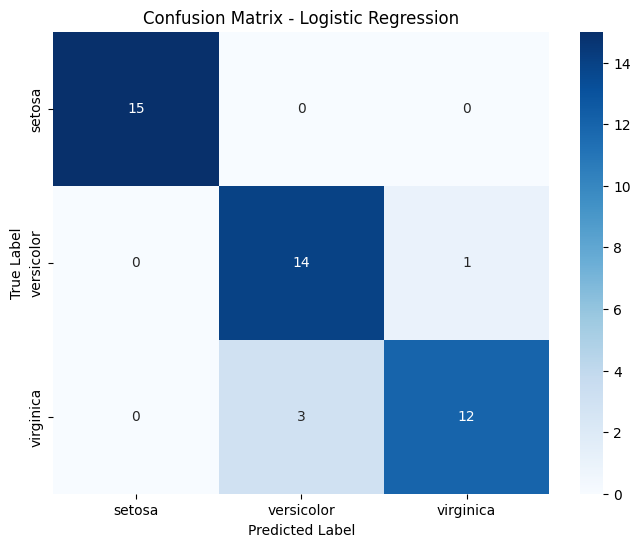

In [4]:
# Porównanie różnych algorytmów klasyfikacji
print("=== Algorytmy klasyfikacji ===")

# Słownik z modelami do porównania
classifiers = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(random_state=42),
}

# Trenowanie i ocena każdego modelu
results = {}

for name, classifier in classifiers.items():
    print(f"\n--- {name} ---")
    
    # Trenowanie
    classifier.fit(X_train, y_train)
    
    # Predykcje
    y_pred = classifier.predict(X_test)
    
    # Ocena
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    
    print(f"Accuracy: {accuracy:.4f}")
    
    # Raport klasyfikacji
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Porównanie wyników
print("\n=== Porównanie wyników ===")
for model, acc in sorted(results.items(), key=lambda x: x[1], reverse=True):
    print(f"{model}: {acc:.4f}")

# Macierz pomyłek dla najlepszego modelu
best_model_name = max(results, key=results.get)
best_model = classifiers[best_model_name]
y_pred_best = best_model.predict(X_test)

print(f"\n=== Macierz pomyłek - {best_model_name} ===")
cm = confusion_matrix(y_test, y_pred_best)
print(cm)

# Wizualizacja macierzy pomyłek
try:
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=iris.target_names, 
                yticklabels=iris.target_names)
    plt.title(f'Confusion Matrix - {best_model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
except:
    print("Nie można wyświetlić wykresu - matplotlib może być niedostępny")


## 4. Regresja

Regresja służy do przewidywania wartości ciągłych. Użyjemy danych Boston Housing (lub wygenerowanych danych).


=== Regresja ===
Dane regresji: (100, 4) próbek, 4 cech

--- Linear Regression ---
MSE: 0.0105
R² Score: 1.0000

--- Random Forest ---
MSE: 1177.3575
R² Score: 0.8087

=== Porównanie modeli regresji ===
Linear Regression: MSE=0.0105, R²=1.0000
Random Forest: MSE=1177.3575, R²=0.8087


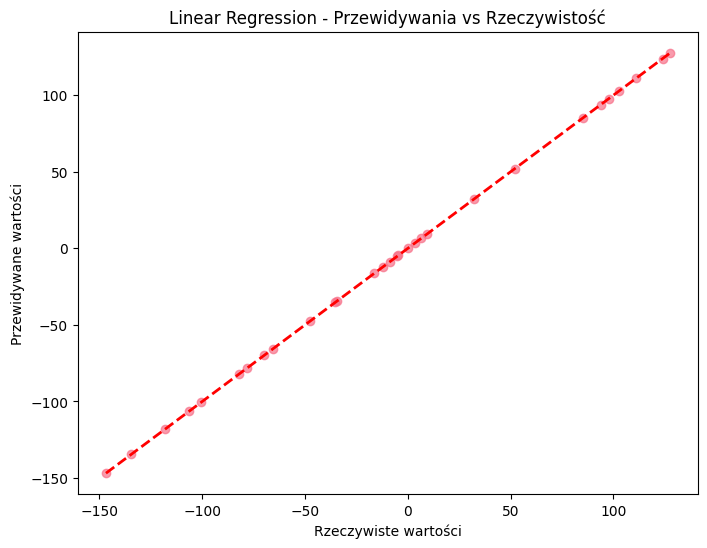

In [5]:
# Przykład regresji
print("=== Regresja ===")

# Generowanie syntetycznych danych dla regresji
from sklearn.datasets import make_regression
X_reg, y_reg = make_regression(n_samples=100, n_features=4, noise=0.1, random_state=42)

# Podział danych
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.3, random_state=42
)

# Skalowanie danych
scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)

print(f"Dane regresji: {X_reg.shape} próbek, {X_reg.shape[1]} cech")

# Modele regresji
regressors = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
}

regression_results = {}

for name, regressor in regressors.items():
    print(f"\n--- {name} ---")
    
    # Trenowanie
    if 'Linear' in name:
        regressor.fit(X_train_reg_scaled, y_train_reg)
        y_pred_reg = regressor.predict(X_test_reg_scaled)
    else:
        regressor.fit(X_train_reg, y_train_reg)
        y_pred_reg = regressor.predict(X_test_reg)
    
    # Ocena
    mse = mean_squared_error(y_test_reg, y_pred_reg)
    r2 = r2_score(y_test_reg, y_pred_reg)
    
    regression_results[name] = {'MSE': mse, 'R2': r2}
    
    print(f"MSE: {mse:.4f}")
    print(f"R² Score: {r2:.4f}")

# Porównanie wyników regresji
print("\n=== Porównanie modeli regresji ===")
for model, metrics in regression_results.items():
    print(f"{model}: MSE={metrics['MSE']:.4f}, R²={metrics['R2']:.4f}")

# Wizualizacja wyników regresji (dla Linear Regression)
try:
    lr = LinearRegression()
    lr.fit(X_train_reg_scaled, y_train_reg)
    y_pred_lr = lr.predict(X_test_reg_scaled)
    
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test_reg, y_pred_lr, alpha=0.7)
    plt.plot([y_test_reg.min(), y_test_reg.max()], 
             [y_test_reg.min(), y_test_reg.max()], 'r--', lw=2)
    plt.xlabel('Rzeczywiste wartości')
    plt.ylabel('Przewidywane wartości')
    plt.title('Linear Regression - Przewidywania vs Rzeczywistość')
    plt.show()
except:
    print("Nie można wyświetlić wykresu")


## 5. Klastrowanie

Klastrowanie to uczenie nienadzorowane służące do grupowania podobnych próbek.


=== Klastrowanie ===
=== K-Means ===
Liczba klastrów:           3
Inertia (sum of squares):  139.8205
Adjusted Rand Index (ARI): 0.6201
Silhouette Score:          0.4599

=== DBSCAN ===
Liczba klastrów: 2
Liczba punktów szumu: 34
Adjusted Rand Index (ARI): 0.4421
Silhouette Score:          0.6559


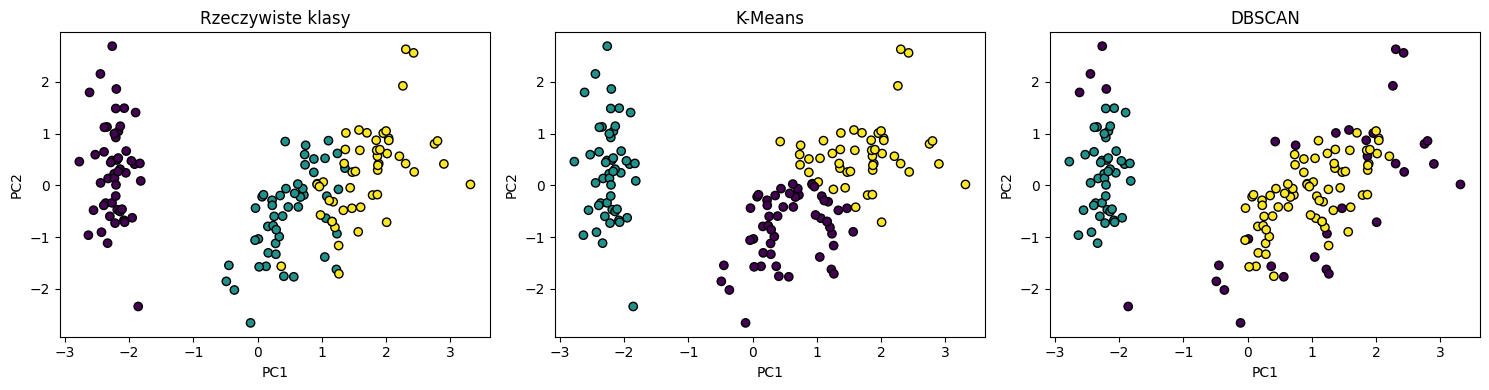

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import adjusted_rand_score, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Przykłady klastrowania
print("=== Klastrowanie ===")

# Używamy danych Iris (bez etykiet dla uczenia nienadzorowanego)
iris = load_iris()
X = iris.data
y_true = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. K-Means
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

n_clusters_kmeans = len(np.unique(kmeans_labels))
inertia = kmeans.inertia_
ari_kmeans = adjusted_rand_score(y_true, kmeans_labels)
silhouette_kmeans = silhouette_score(X_scaled, kmeans_labels)

print("=== K-Means ===")
print(f"Liczba klastrów:           {n_clusters_kmeans}")
print(f"Inertia (sum of squares):  {inertia:.4f}")
print(f"Adjusted Rand Index (ARI): {ari_kmeans:.4f}")
print(f"Silhouette Score:          {silhouette_kmeans:.4f}")

# 3. DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Wyznaczenie liczby klastrów (bez szumu)
labels_unique = set(dbscan_labels) - {-1}
n_clusters_dbscan = len(labels_unique)
n_noise = list(dbscan_labels).count(-1)

print("\n=== DBSCAN ===")
print(f"Liczba klastrów: {n_clusters_dbscan}")
print(f"Liczba punktów szumu: {n_noise}")

if n_clusters_dbscan >= 1:
    ari_dbscan = adjusted_rand_score(y_true, dbscan_labels)
    print(f"Adjusted Rand Index (ARI): {ari_dbscan:.4f}")
    
    if n_clusters_dbscan >= 2:
        # Silhouette tylko gdy co najmniej 2 klastry
        mask = dbscan_labels != -1
        silhouette_dbscan = silhouette_score(X_scaled[mask], dbscan_labels[mask])
        print(f"Silhouette Score:          {silhouette_dbscan:.4f}")
    else:
        print("Silhouette Score:          wymaga ≥ 2 klastrów (pominięte)")

# 4. Wizualizacja 2D przez PCA
try:
    pca = PCA(n_components=2, random_state=42)
    X_pca = pca.fit_transform(X_scaled)

    fig, axes = plt.subplots(1, 3, figsize=(15, 4))

    axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y_true, cmap='viridis', edgecolor='k')
    axes[0].set_title('Rzeczywiste klasy')
    axes[0].set_xlabel('PC1'); axes[0].set_ylabel('PC2')

    axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', edgecolor='k')
    axes[1].set_title('K-Means')
    axes[1].set_xlabel('PC1'); axes[1].set_ylabel('PC2')

    axes[2].scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='viridis', edgecolor='k')
    axes[2].set_title('DBSCAN')
    axes[2].set_xlabel('PC1'); axes[2].set_ylabel('PC2')

    plt.tight_layout()
    plt.show()
    
except:
    print("Nie można wyświetlić wykresów - matplotlib może być niedostępny")


## 6. Redukcja wymiarowości

PCA (Principal Component Analysis) to popularna technika redukcji wymiarowości.


=== PCA - Redukcja wymiarowości ===
Wyjaśniona wariancja przez każdą składową:
PC1: 0.7296 (72.96%)
PC2: 0.2285 (22.85%)
PC3: 0.0367 (3.67%)
PC4: 0.0052 (0.52%)

Skumulowana wyjaśniona wariancja:
PC1-PC1: 0.7296 (72.96%)
PC1-PC2: 0.9581 (95.81%)
PC1-PC3: 0.9948 (99.48%)
PC1-PC4: 1.0000 (100.00%)

PCA 2D - wyjaśniona wariancja: 0.9581

=== Klasyfikacja z PCA ===
Accuracy z oryginalnymi cechami (4D): 0.8889
Accuracy z PCA (2D): 0.8667
Redukcja wymiarów: 4 -> 2


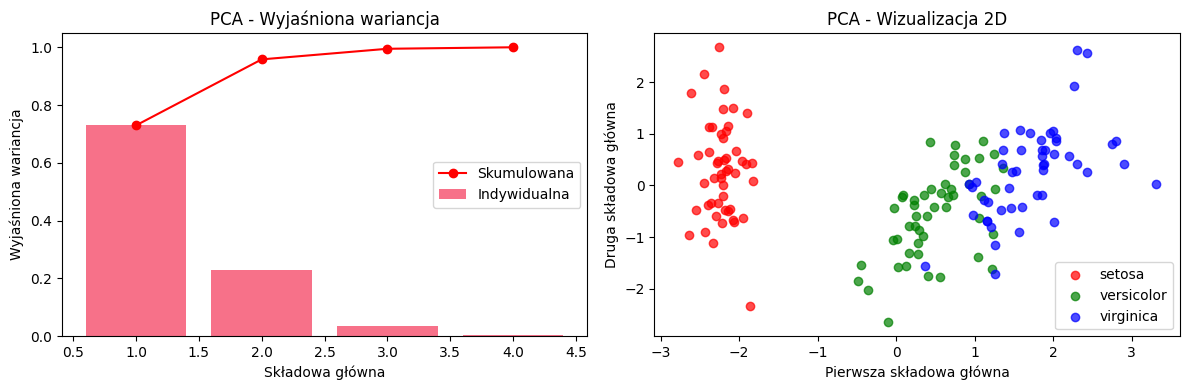

In [7]:
# Principal Component Analysis (PCA)
print("=== PCA - Redukcja wymiarowości ===")

# PCA na danych Iris
pca = PCA()
X_pca = pca.fit_transform(iris_scaled)

# Analiza wyjaśnionej wariancji
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print("Wyjaśniona wariancja przez każdą składową:")
for i, var in enumerate(explained_variance):
    print(f"PC{i+1}: {var:.4f} ({var*100:.2f}%)")

print(f"\nSkumulowana wyjaśniona wariancja:")
for i, cum_var in enumerate(cumulative_variance):
    print(f"PC1-PC{i+1}: {cum_var:.4f} ({cum_var*100:.2f}%)")

# PCA z 2 składowymi
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(iris_scaled)

print(f"\nPCA 2D - wyjaśniona wariancja: {pca_2d.explained_variance_ratio_.sum():.4f}")

# Test klasyfikacji z danymi po PCA
print("\n=== Klasyfikacja z PCA ===")

# Podział danych po PCA
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca_2d, iris.target, test_size=0.3, random_state=42, stratify=iris.target
)

# Trenowanie modelu na danych po PCA
rf_pca = RandomForestClassifier(n_estimators=100, random_state=42)
rf_pca.fit(X_train_pca, y_train_pca)
accuracy_pca = rf_pca.score(X_test_pca, y_test_pca)

# Porównanie z modelem na oryginalnych danych
rf_orig = RandomForestClassifier(n_estimators=100, random_state=42)
rf_orig.fit(X_train, y_train)
accuracy_orig = rf_orig.score(X_test, y_test)

print(f"Accuracy z oryginalnymi cechami (4D): {accuracy_orig:.4f}")
print(f"Accuracy z PCA (2D): {accuracy_pca:.4f}")
print(f"Redukcja wymiarów: {iris.data.shape[1]} -> {X_pca_2d.shape[1]}")

# Wizualizacja PCA
try:
    plt.figure(figsize=(12, 4))
    
    # Wykres wyjaśnionej wariancji
    plt.subplot(1, 2, 1)
    plt.bar(range(1, len(explained_variance) + 1), explained_variance)
    plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'ro-')
    plt.xlabel('Składowa główna')
    plt.ylabel('Wyjaśniona wariancja')
    plt.title('PCA - Wyjaśniona wariancja')
    plt.legend(['Skumulowana', 'Indywidualna'])
    
    # Wykres 2D PCA
    plt.subplot(1, 2, 2)
    colors = ['red', 'green', 'blue']
    for i, color in enumerate(colors):
        mask = iris.target == i
        plt.scatter(X_pca_2d[mask, 0], X_pca_2d[mask, 1], 
                   c=color, label=iris.target_names[i], alpha=0.7)
    plt.xlabel('Pierwsza składowa główna')
    plt.ylabel('Druga składowa główna')
    plt.title('PCA - Wizualizacja 2D')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
except:
    print("Nie można wyświetlić wykresów PCA")


## 7. Ocena modeli

Scikit-learn oferuje wiele metryk i technik walidacji do oceny jakości modeli.


=== Cross-Validation ===
5-fold CV scores: [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
Średnie CV score: 0.9667 (+/- 0.0422)

=== Różne metryki CV ===
accuracy: 0.9667 (+/- 0.0422)
precision_macro: 0.9707 (+/- 0.0352)
recall_macro: 0.9667 (+/- 0.0422)
f1_macro: 0.9665 (+/- 0.0426)

=== Learning Curves ===
Train scores dla różnych rozmiarów zbioru:
Size 12: 1.0000 (+/- 0.0000)
Size 24: 1.0000 (+/- 0.0000)
Size 36: 1.0000 (+/- 0.0000)
Size 48: 1.0000 (+/- 0.0000)
Size 60: 1.0000 (+/- 0.0000)
Size 72: 1.0000 (+/- 0.0000)
Size 84: 1.0000 (+/- 0.0000)
Size 96: 1.0000 (+/- 0.0000)
Size 108: 1.0000 (+/- 0.0000)
Size 120: 1.0000 (+/- 0.0000)


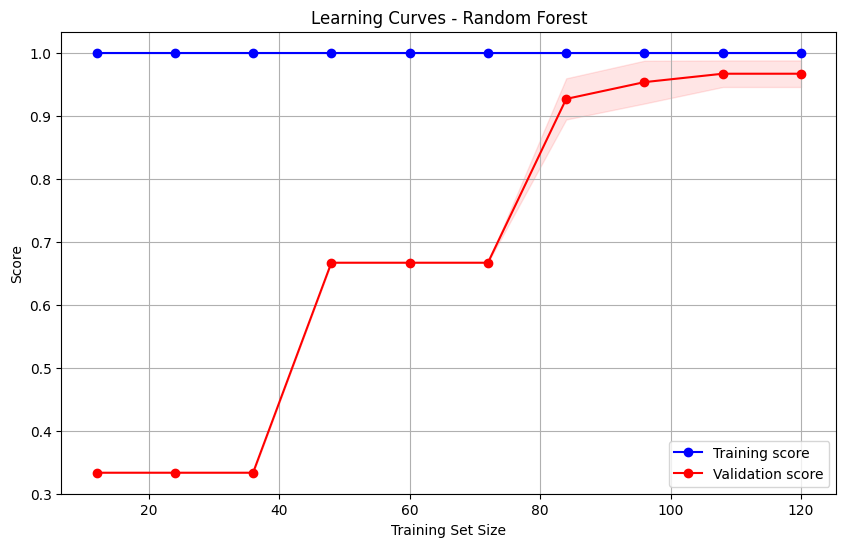

In [8]:
# Cross-validation i ocena modeli
print("=== Cross-Validation ===")

# Model do oceny
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# K-fold cross-validation
cv_scores = cross_val_score(rf_model, iris_scaled, iris.target, cv=5)

print(f"5-fold CV scores: {cv_scores}")
print(f"Średnie CV score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Różne metryki w cross-validation
from sklearn.model_selection import cross_validate

scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
cv_results = cross_validate(rf_model, iris_scaled, iris.target, cv=5, scoring=scoring)

print("\n=== Różne metryki CV ===")
for metric in scoring:
    scores = cv_results[f'test_{metric}']
    print(f"{metric}: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")

# Learning curves
print("\n=== Learning Curves ===")
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    rf_model, iris_scaled, iris.target, cv=5, 
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
val_mean = val_scores.mean(axis=1)
val_std = val_scores.std(axis=1)

print(f"Train scores dla różnych rozmiarów zbioru:")
for size, score, std in zip(train_sizes, train_mean, train_std):
    print(f"Size {size:.0f}: {score:.4f} (+/- {std:.4f})")

# Wizualizacja learning curves
try:
    plt.figure(figsize=(10, 6))
    
    plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
    
    plt.plot(train_sizes, val_mean, 'o-', color='red', label='Validation score')
    plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='red')
    
    plt.xlabel('Training Set Size')
    plt.ylabel('Score')
    plt.title('Learning Curves - Random Forest')
    plt.legend()
    plt.grid(True)
    plt.show()
    
except:
    print("Nie można wyświetlić learning curves")


## 8. Pipelines i GridSearch

Pipelines umożliwiają łączenie kroków preprocessingu i modelowania. GridSearch automatyzuje szukanie najlepszych hiperparametrów.


In [9]:
# Pipeline - łączenie kroków
print("=== Pipeline ===")

# Tworzenie pipeline z preprocessingiem i modelem
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Trenowanie pipeline
pipe.fit(X_train, y_train)
pipe_accuracy = pipe.score(X_test, y_test)

print(f"Pipeline accuracy: {pipe_accuracy:.4f}")

# Dostęp do poszczególnych kroków
print(f"Scaler: {pipe.named_steps['scaler']}")
print(f"PCA explained variance: {pipe.named_steps['pca'].explained_variance_ratio_.sum():.4f}")

# GridSearchCV - optymalizacja hiperparametrów
print("\n=== GridSearchCV ===")

# Parametry do przeszukania
param_grid = {
    'pca__n_components': [2, 3, 4],
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [3, 5, None]
}

# GridSearchCV
grid_search = GridSearchCV(
    pipe, 
    param_grid, 
    cv=5, 
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

print("Rozpoczynam GridSearch...")
grid_search.fit(X_train, y_train)

print(f"\nNajlepsze parametry: {grid_search.best_params_}")
print(f"Najlepszy CV score: {grid_search.best_score_:.4f}")

# Ocena na zbiorze testowym
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print(f"Test accuracy najlepszego modelu: {test_accuracy:.4f}")

# Wyniki dla wszystkich kombinacji
print("\n=== Top 5 kombinacji parametrów ===")
results_df = pd.DataFrame(grid_search.cv_results_)
top_results = results_df.nlargest(5, 'mean_test_score')[
    ['params', 'mean_test_score', 'std_test_score']
]

for idx, row in top_results.iterrows():
    print(f"Score: {row['mean_test_score']:.4f} (+/- {row['std_test_score']:.4f})")
    print(f"Params: {row['params']}")
    print("---")

# Porównanie różnych modeli w pipeline
print("\n=== Porównanie różnych modeli ===")

models_to_compare = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('SVM', SVC(random_state=42))
]

pipeline_results = {}

for name, model in models_to_compare:
    model_pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])
    
    # Cross-validation
    cv_scores = cross_val_score(model_pipe, iris.data, iris.target, cv=5)
    pipeline_results[name] = cv_scores.mean()
    
    print(f"{name}: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Najlepszy model
best_pipeline_model = max(pipeline_results, key=pipeline_results.get)
print(f"\nNajlepszy model w pipeline: {best_pipeline_model} ({pipeline_results[best_pipeline_model]:.4f})")


=== Pipeline ===
Pipeline accuracy: 0.9333
Scaler: StandardScaler()
PCA explained variance: 0.9602

=== GridSearchCV ===
Rozpoczynam GridSearch...
Fitting 5 folds for each of 27 candidates, totalling 135 fits

Najlepsze parametry: {'classifier__max_depth': None, 'classifier__n_estimators': 50, 'pca__n_components': 4}
Najlepszy CV score: 0.9524
Test accuracy najlepszego modelu: 0.9111

=== Top 5 kombinacji parametrów ===
Score: 0.9524 (+/- 0.0301)
Params: {'classifier__max_depth': None, 'classifier__n_estimators': 50, 'pca__n_components': 4}
---
Score: 0.9524 (+/- 0.0301)
Params: {'classifier__max_depth': None, 'classifier__n_estimators': 200, 'pca__n_components': 3}
---
Score: 0.9524 (+/- 0.0000)
Params: {'classifier__max_depth': None, 'classifier__n_estimators': 200, 'pca__n_components': 4}
---
Score: 0.9429 (+/- 0.0190)
Params: {'classifier__max_depth': 3, 'classifier__n_estimators': 200, 'pca__n_components': 4}
---
Score: 0.9429 (+/- 0.0356)
Params: {'classifier__max_depth': 5, 'cla

## 9. Praktyczne przykłady i podsumowanie

### Przepływ pracy ML z scikit-learn:

1. **Załaduj i przeanalizuj dane** - `pd.read_csv()`, `data.info()`, `data.describe()`
2. **Preprocessing** - `StandardScaler()`, `LabelEncoder()`, `train_test_split()`
3. **Wybierz algorytm** - klasyfikacja, regresja, klastrowanie
4. **Trenuj model** - `model.fit(X_train, y_train)`
5. **Oceń model** - `model.score()`, `cross_val_score()`, confusion matrix
6. **Optymalizuj** - `GridSearchCV()`, feature engineering
7. **Wdróż** - Pipeline, model persistence

### Najważniejsze algorytmy w scikit-learn:

#### Klasyfikacja:
- **LogisticRegression** - prosty, interpretowalny
- **RandomForestClassifier** - potężny, odporny na overfitting
- **SVC** - dobry dla złożonych granic decyzyjnych
- **KNeighborsClassifier** - prosty, dobry baseline

#### Regresja:
- **LinearRegression** - prosty, interpretowalny
- **RandomForestRegressor** - potężny, nieparametryczny
- **SVR** - dobry dla nieliniowych relacji
- **Ridge/Lasso** - regularyzacja dla linear regression

#### Klastrowanie:
- **KMeans** - szybki, wymaga określenia liczby klastrów
- **DBSCAN** - znajduje klastry o dowolnych kształtach
- **AgglomerativeClustering** - hierarchiczne klastrowanie

#### Redukcja wymiarowości:
- **PCA** - linear dimensionality reduction
- **t-SNE** - nieliniowa wizualizacja
- **UMAP** - nowoczesna alternatywa dla t-SNE


In [10]:
# Przykład kompleksowego pipeline dla nowych danych
print("=== Kompleksowy przykład ===")

# Funkcja do przygotowania nowych danych
def preprocess_and_predict(new_data, trained_pipeline):
    """
    Funkcja do preprocessingu i predykcji nowych danych
    """
    predictions = trained_pipeline.predict(new_data)
    probabilities = None
    
    # Sprawdź czy model ma predict_proba
    if hasattr(trained_pipeline.named_steps['classifier'], 'predict_proba'):
        probabilities = trained_pipeline.named_steps['classifier'].predict_proba(
            trained_pipeline[:-1].transform(new_data)
        )
    
    return predictions, probabilities

# Przykład użycia
sample_data = iris.data[:3]  # Pierwsze 3 próbki jako "nowe dane"

# Użyj najlepszego pipeline z GridSearch
if 'best_model' in locals():
    predictions, probabilities = preprocess_and_predict(sample_data, best_model)
    
    print("Nowe dane (pierwsze 3 próbki Iris):")
    print(sample_data)
    
    print(f"\nPredykcje: {predictions}")
    print(f"Nazwy klas: {[iris.target_names[pred] for pred in predictions]}")
    
    if probabilities is not None:
        print(f"\nPrawdopodobieństwa:")
        for i, prob in enumerate(probabilities):
            print(f"Próbka {i+1}: {prob}")

# Porady praktyczne
print("\n" + "="*50)
print("PORADY PRAKTYCZNE")
print("="*50)

tips = [
    "1. Zawsze rozpocznij od eksploracji danych (EDA)",
    "2. Podziel dane na train/validation/test PRZED jakimkolwiek preprocessingiem",
    "3. Użyj Pipeline aby uniknąć data leakage",
    "4. Cross-validation do oceny, test set tylko na końcu",
    "5. Zacznij od prostych modeli (baseline), potem kompleksowe",
    "6. StandardScaler dla SVM i regresji liniowej",
    "7. RandomForest rzadko wymaga skalowania",
    "8. GridSearch może być kosztowny - zacznij od małej siatki",
    "9. Zapisuj najlepsze modele i pipeline",
    "10. Dokumentuj eksperymenty i wyniki"
]

for tip in tips:
    print(tip)

print(f"\nScikit-learn version: {sklearn.__version__}")

=== Kompleksowy przykład ===
Nowe dane (pierwsze 3 próbki Iris):
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]

Predykcje: [2 2 2]
Nazwy klas: ['virginica', 'virginica', 'virginica']

Prawdopodobieństwa:
Próbka 1: [0.   0.04 0.96]
Próbka 2: [0.   0.04 0.96]
Próbka 3: [0.   0.06 0.94]

PORADY PRAKTYCZNE
1. Zawsze rozpocznij od eksploracji danych (EDA)
2. Podziel dane na train/validation/test PRZED jakimkolwiek preprocessingiem
3. Użyj Pipeline aby uniknąć data leakage
4. Cross-validation do oceny, test set tylko na końcu
5. Zacznij od prostych modeli (baseline), potem kompleksowe
6. StandardScaler dla SVM i regresji liniowej
7. RandomForest rzadko wymaga skalowania
8. GridSearch może być kosztowny - zacznij od małej siatki
9. Zapisuj najlepsze modele i pipeline
10. Dokumentuj eksperymenty i wyniki

Scikit-learn version: 1.6.1
